# Titanic - Machine Learning from Disaster

***Import packages and definition of usefull functions***

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### 1.1 Import Data

Variable	
survival: 0 = No, 1 = Yes

pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	
Age in years	

sibsp:	# of siblings / spouses aboard the Titanic	

parch:	# of parents / children aboard the Titanic	

ticket:	Ticket number	
fare	Passenger fare	
cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Desciption:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Task 1**: import data

In [2]:
df_train = pd.read_csv("train.csv")
df_train = df_train.set_index('PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("test.csv")
df_test = df_test.set_index('PassengerId')
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.2 Missing data & Replace data

Missing values are reported using ? character.

**Task 2**: Generate a barplot that displays for each feature the number of missing values

<AxesSubplot:>

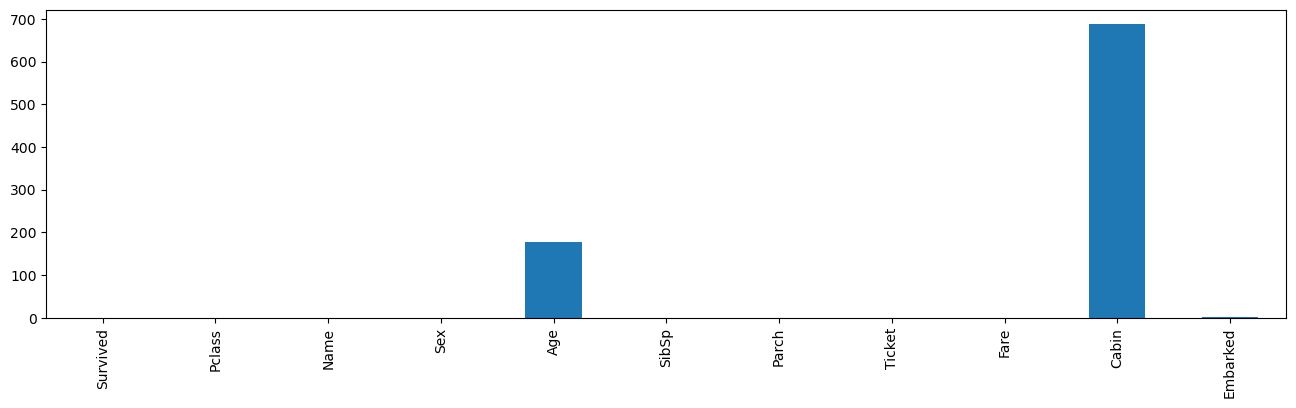

In [4]:
plt.figure(figsize=(16,4))
(len(df_train.index)-df_train.count()).plot.bar()

<AxesSubplot:>

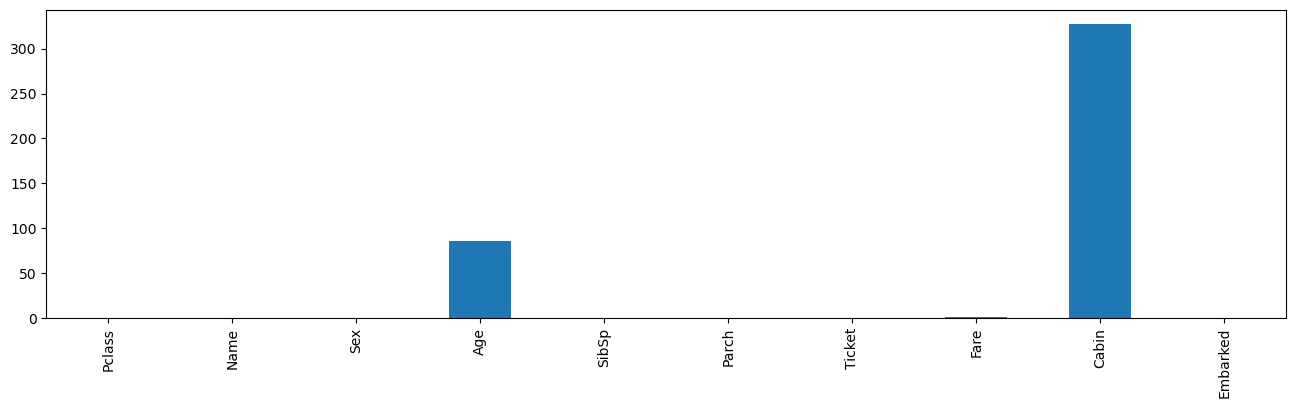

In [5]:
plt.figure(figsize=(16,4))
(len(df_test.index)-df_test.count()).plot.bar()

**Task 3**:
- Step 1: Remove from the dataset all features that contain more than 300 missing values
- Step 2: Remove all missing values from the dataset
- Step 3: Remove the columns not significant

In [6]:
df_train = df_train.drop(df_train.columns[df_train.apply(lambda col: col.isnull().sum() > 500)], axis=1)
df_train.dropna(inplace=True)
df_train =df_train.drop('Name', axis=1)
df_train =df_train.drop('Ticket', axis=1)
print(df_train.shape)

(712, 8)


In [7]:
df_test = df_test.drop(df_test.columns[df_test.apply(lambda col: col.isnull().sum() > 300)], axis=1)
df_test.dropna(inplace=True)
df_test =df_test.drop('Name', axis=1)
df_test =df_test.drop('Ticket', axis=1)
print(df_test.shape)

(331, 7)


In [8]:
df_train['Sex'] = preprocessing.LabelEncoder().fit_transform(df_train['Sex'])
df_train['Embarked'] = preprocessing.LabelEncoder().fit_transform(df_train['Embarked'])
df_test['Sex'] = preprocessing.LabelEncoder().fit_transform(df_test['Sex'])
df_test['Embarked'] = preprocessing.LabelEncoder().fit_transform(df_test['Embarked'])



In [9]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,3,0,39.0,0,5,29.1250,1
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2


## 2. Training set and test set

the original dataset is always split into 2 sets (at least):

- A train set: the dataset on which training is performed and models are fine-tuned
- A test set: the dataset containing unseen data, which is used to assess the performance of the final model

###  2.1 Balancing the dataset

**Task 4-1**: Plot a histogram that reports the number of surviving firms (label=0) and dead firms (label=1) in the **dataset**

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

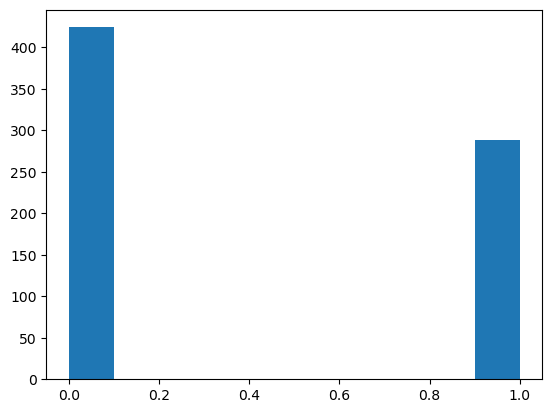

In [10]:
plt.hist(df_train.iloc[:,0])

The next step is to separate the labels from the features

**Task 3**: 
- Create the `Ytrain` and `Ytest` dataframes with the <u>labels</u> from the `Train` and the `Test` dataframes, respectively
- Create the `Xtrain` and `Xtest` dataframes with the <u>features</u> from the `Train` and the `Test` dataframes, respectively


In [11]:
# Extract labels
Ytrain = df_train.iloc[:,0]
#Ytest = df_y_train

# Extract features
Xtrain = df_train.iloc[:, 1:]
Xtest = df_test

In [12]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250,1
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2


In [13]:
X_train, X_check, Y_train, Y_check = train_test_split(Xtrain, Ytrain, test_size = 0.25, random_state=56)


In [14]:
Y_train = pd.DataFrame(Y_train)
Y_check = pd.DataFrame(Y_check)

## 3. Les features

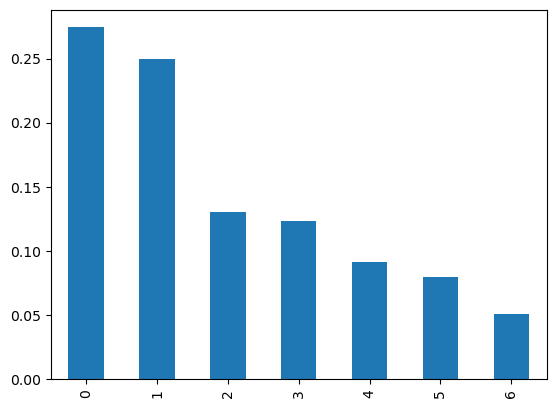

In [15]:
# Importation des bibliothèques
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xtrain)

# Créer l'objet PCA et ajuster les données
pca = PCA()
pca.fit(X_scaled)

# Visualiser la variance expliquée par chaque composante
explained_variance = pd.Series(pca.explained_variance_ratio_)
explained_variance.plot(kind='bar')

# Déterminer le nombre de composantes à conserver
n_components = 2 # nombre de composantes à conserver

# Transformer les données en utilisant l'objet PCA ajusté
X_pca = pca.transform(X_scaled)[:, :n_components]

# Renvoyer les colonnes à garder pour des prédictions
columns_to_keep = Xtrain.columns[:n_components]



## 4. Modèle de référence: Random Forest

In [16]:
random_forest = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=55)

### 4.2 Fit the model

In [17]:
random_forest.fit(X_train, Y_train)

/var/folders/v0/nc1f5zsn77q7z2fmmhv7_hp80000gn/T/ipykernel_90944/1901395786.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=55)

### 4.3 Prediction & Evaluation

In [18]:
Y_pred_rf = random_forest.predict(Xtest)
Y_pred_train_rf = random_forest.predict(X_check)

In [19]:
accuracy_score_rf = accuracy_score(Y_check, Y_pred_train_rf)
print(accuracy_score_rf)

0.8258426966292135


### 4.4 En plus: Bagging

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=42)
bag_clf.fit(X_train, Y_train)

/Users/cassandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=500, oob_score=True, random_state=42)

In [21]:
Y_pred_train_bag = bag_clf.predict(X_check)
accuracy_score_bag = accuracy_score(Y_check, Y_pred_train_bag)

## 5. Clustering

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


<AxesSubplot:xlabel='Age', ylabel='Fare'>

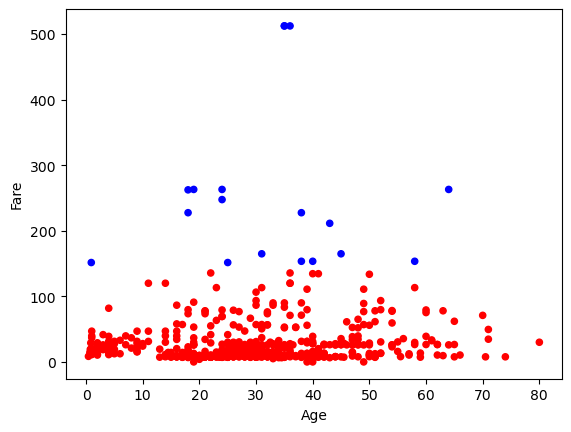

In [23]:
# Charger les données à partir des deux DataFrames X_train et Y_train
X_train_k = X_train
X = X_train.values

# Initialiser le modèle K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Entraîner le modèle sur les données
kmeans.fit(X)

# Prédire les clusters pour chaque point de données
Y_pred_train_k = kmeans.predict(X)


# Afficher les clusters avec différentes couleurs
colors = {0: 'red', 1: 'blue'}
X_train_k.plot.scatter(x='Age', y='Fare', c=pd.Series(Y_pred_train_k).apply(lambda x: colors[x]))


<AxesSubplot:xlabel='Age', ylabel='Fare'>

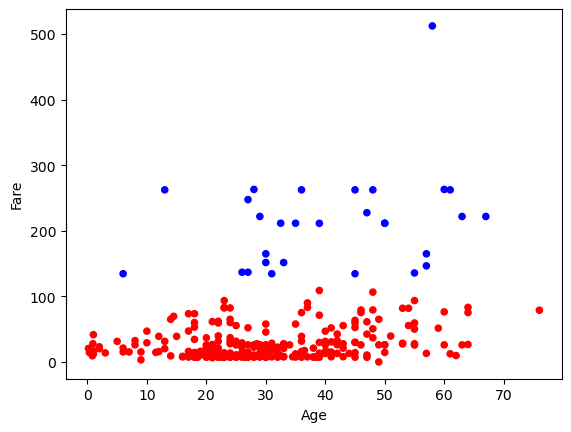

In [24]:
# Charger les données à partir des deux DataFrames X_train et Y_train
X_test_k = Xtest
X = X_test_k.values

# Initialiser le modèle K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Entraîner le modèle sur les données
kmeans.fit(X)

# Prédire les clusters pour chaque point de données
Y_pred_k = kmeans.predict(X)


# Afficher les clusters avec différentes couleurs
colors = {0: 'red', 1: 'blue'}
X_test_k.plot.scatter(x='Age', y='Fare', c=pd.Series(Y_pred_k).apply(lambda x: colors[x]))


## 6. Modèle supervisé: SVM

In [25]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="scale", random_state=42)

In [26]:
svm_clf.fit(X_train, Y_train)
Y_pred_train_svm = svm_clf.predict(X_check)
accuracy_score_svm = accuracy_score(Y_check, Y_pred_train_svm)
print(accuracy_score_svm)

0.6797752808988764


/Users/cassandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 7. Variables importance

In [27]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, Y_train)
rnd_clf.feature_importances_

/var/folders/v0/nc1f5zsn77q7z2fmmhv7_hp80000gn/T/ipykernel_90944/4169218540.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, Y_train)


array([0.10170331, 0.2224711 , 0.28077184, 0.05633353, 0.04052976,
       0.2697283 , 0.02846215])

In [28]:
np.sum(rnd_clf.feature_importances_)

1.0

In [29]:
feature_names = X_train.columns.tolist()
for name, score in zip(feature_names, rnd_clf.feature_importances_):
    print(name, score)

Pclass 0.10170331486949402
Sex 0.22247110430535333
Age 0.2807718396788797
SibSp 0.05633352747197062
Parch 0.040529757082745824
Fare 0.26972830331466086
Embarked 0.028462153276895646


## 8.  Modèle de deep learning

## 9. Comparaison performance & Analyse

### 9.1 Comparaison des performances

In [30]:
data_perf = [{'Modele': 'Random Forest', 'Accuracy': accuracy_score_rf},
        {'Modele': 'K Mean', 'Accuracy': 0},
        {'Modele': 'Bagging', 'Accuracy': accuracy_score_bag},
        {'Modele': 'SVM', 'Accuracy': accuracy_score_svm},
        {'Modele': 'Deep Learning', 'Accuracy': 0}]

df_perf = pd.DataFrame(data_perf)

### 9.2 Analyse

In [31]:
df_perf

,Modele,Accuracy
0,Random Forest,0.825843
1,K Mean,0.000000
2,Bagging,0.758427
3,SVM,0.679775
4,Deep Learning,0.000000


Le modele le plus performant est le random forest